# Part 1 (a)

CS190DD

Samuel Guo, Jason Yu, Joanna Kim

In [257]:
# 1

import numpy as np

data = np.load('part1a.npz')

Svc_0 = data['Svc_0_pmf'] * (data['N'] - sum(data['Ic_0']))
Ic_0 = data['Ic_0']
Lc = data['Lc']
g = data['gamma']

Bvc = np.zeros((4,4))
for i in range(4):
    Bvc[i] = np.linspace(0.25*i, 0.25*(i+1), num=4)
Bvc[0][0] = 0.05

t=range(120)

y0 = np.concatenate((Svc_0.flatten(), Ic_0))
y0 = np.append(y0, 0)

In [258]:
def SIR_model(t, Y, betas, gamma):
    S_vector=Y[:16]
    I_vector=Y[16:20]
    R=Y[20]
    dSvc_dt = -betas * S_vector * sum(I_vector) / 100000
    dsums = [0 - sum(dSvc_dt[0:4]), 0 - sum(dSvc_dt[4:8]), 0 - sum(dSvc_dt[8:12]), 0 - sum(dSvc_dt[12:16])]
    dIc_dt = dsums - gamma * I_vector
    dR_dt = sum(I_vector) * gamma
    RHS_vector = np.concatenate((dSvc_dt, dIc_dt), axis=0)
    RHS_vector = np.append(RHS_vector, dR_dt)

    return RHS_vector

In [259]:
from scipy import integrate

sim = integrate.solve_ivp(SIR_model, (t[0], t[-1]), y0, args=(Bvc.flatten(), g), dense_output=True)

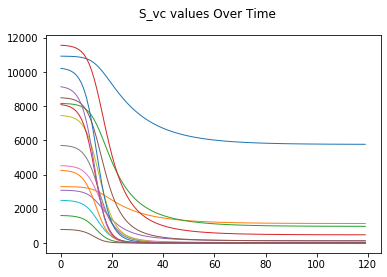

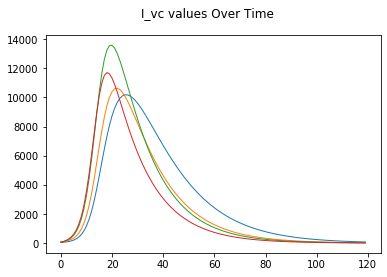

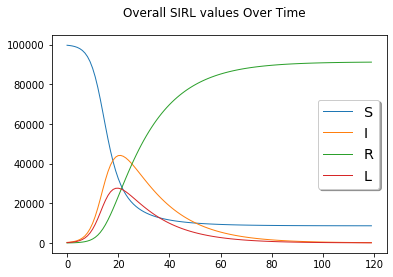

In [260]:
# 2

import matplotlib.pyplot as plt

plt.plot(t, sim.sol(t).T[:,:16], linewidth = 1)
plt.suptitle("S_vc values Over Time")
plt.show()

plt.plot(t, sim.sol(t).T[:,16:20], linewidth = 1)
plt.suptitle("I_vc values Over Time")
plt.show()

Lt = Lc * sim.sol(t).T[:,16:20]
Lt = sum(Lt.T)
Lt

plt.plot(t, sum(sim.sol(t)[:16]), linewidth = 1, label='S')
plt.plot(t, sum(sim.sol(t)[16:20]), linewidth = 1, label='I')
plt.plot(t, sim.sol(t)[20], linewidth = 1, label='R')
plt.plot(t, Lt, linewidth = 1, label='L')
plt.suptitle("Overall SIRL values Over Time")
plt.legend(loc='center right', shadow=True, fontsize='x-large')
plt.show()

3. Yes, the shapes of S,I,R are what we expect. The Susceptible rate decreases over time as more and more people get  COVID and the amount of people who did not get COVID decrease. The Infected rate has a sharp increase and then decreases as the rate of people getting COVID rapidly increase, hit a peak and then decreases. The Recovered rate starts off as 0 since no one had COVID in the beginning, and then purely increases as the infected people recover. The Viral Load follows the same trend as the Infected; it increases, hits a point, and then decreases. The curve that people refer when they say “flatten the curve” is the Infected curve, because we want to lower and decrease the slope of Infected people, which is currently increasing. 

4. Yes, we did observe that some Svc compartments converged to zero while others converged to a positive value. For the populations where the Svc converged to 0, that means that everyone got COVID and there were no more people that would be susceptible to COVID. Whereas the populations where the Svc converged to a positive value, that means that COVID was eradicated before everyone could get infected, which makes the number of people who are still susceptible to COVID constant over time. This is probably due to the fact that the compartments with lower infection rates (beta) were able to prevent the spread of the virus to all of the population.

In [261]:
# 5

Svc_original = data['Svc_0_pmf'] * (data['N'])

percent_never_infected = sim.sol(120)[:16] / Svc_original.flatten() * 100

percent_never_infected = np.around(percent_never_infected,1)

x = 1

for i in percent_never_infected:
    print("Compartment", x, ":", i, "%")
    x += 1

Compartment 1 : 52.7 %
Compartment 2 : 34.4 %
Compartment 3 : 11.9 %
Compartment 4 : 4.1 %
Compartment 5 : 4.1 %
Compartment 6 : 1.4 %
Compartment 7 : 0.5 %
Compartment 8 : 0.2 %
Compartment 9 : 0.2 %
Compartment 10 : 0.1 %
Compartment 11 : 0.0 %
Compartment 12 : 0.0 %
Compartment 13 : 0.0 %
Compartment 14 : 0.0 %
Compartment 15 : 0.0 %
Compartment 16 : 0.0 %


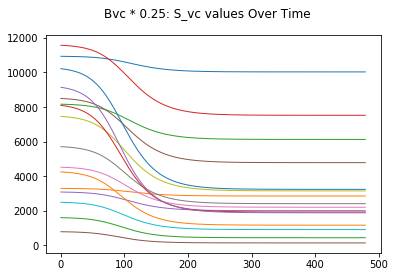

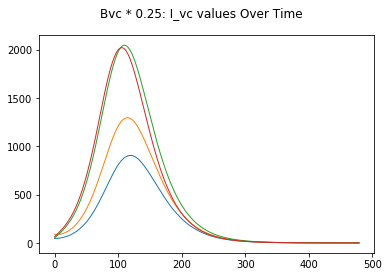

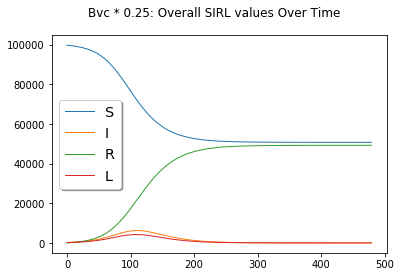

Compartment 1 : 95.3 %
Compartment 2 : 92.4 %
Compartment 3 : 85.6 %
Compartment 4 : 79.4 %
Compartment 5 : 79.4 %
Compartment 6 : 73.5 %
Compartment 7 : 68.1 %
Compartment 8 : 63.1 %
Compartment 9 : 63.1 %
Compartment 10 : 58.5 %
Compartment 11 : 54.2 %
Compartment 12 : 50.2 %
Compartment 13 : 50.2 %
Compartment 14 : 46.5 %
Compartment 15 : 43.1 %
Compartment 16 : 39.9 %


In [262]:
# 6

Bvc4 = Bvc * 0.25

t=range(480)

sim = integrate.solve_ivp(SIR_model, (t[0], t[-1]), y0, args=(Bvc4.flatten(), g), dense_output=True)

import matplotlib.pyplot as plt

plt.plot(t, sim.sol(t).T[:,:16], linewidth = 1)
plt.suptitle("Bvc * 0.25: S_vc values Over Time")
plt.show()

plt.plot(t, sim.sol(t).T[:,16:20], linewidth = 1)
plt.suptitle("Bvc * 0.25: I_vc values Over Time")
plt.show()

Lt = Lc * sim.sol(t).T[:,16:20]
Lt = sum(Lt.T)
Lt

plt.plot(t, sum(sim.sol(t)[:16]), linewidth = 1, label='S')
plt.plot(t, sum(sim.sol(t)[16:20]), linewidth = 1, label='I')
plt.plot(t, sim.sol(t)[20], linewidth = 1, label='R')
plt.plot(t, Lt, linewidth = 1, label='L')
plt.suptitle("Bvc * 0.25: Overall SIRL values Over Time")
plt.legend(loc='center left', shadow=True, fontsize='x-large')
plt.show()

Svc_original = data['Svc_0_pmf'] * (data['N'])

percent_never_infected = sim.sol(120)[:16] / Svc_original.flatten() * 100

percent_never_infected = np.around(percent_never_infected,1)

x = 1

for i in percent_never_infected:
    print("Compartment", x, ":", i, "%")
    x += 1

Yes, the Infected curve flattened significantly compared to before beta values were multiplied by $\frac{1}{4}$.